In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
def load_data(file_path, file_type):
    if file_type == 'csv':
        data = pd.read_csv(file_path)
    elif file_type == 'excel':
        data = pd.read_excel(file_path)
    elif file_type == 'sql':
        if db_connection is None:
            raise ValueError("Please provide a database connection string.")
        engine = create_engine(db_connection)
        query = "SELECT * FROM your_table_name"
        data = pd.read_sql(query, engine)
    else:
        raise ValueError("Unsupported file type.")

    return data

In [3]:
file_path='D:\Ai_elctroPi\python_course_electoPi\International_Report_Departures.csv'
file_type='csv'
df=load_data(file_path,file_type)

In [4]:
df.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
5,10/01/2007,2007,10,14761,SFB,33,11928,GLA,493,20444,JN,0,Departures,0,8,8
6,02/01/2002,2002,2,14100,PHL,23,11032,CUN,148,20402,MMQ,1,Departures,0,1,1
7,02/01/2008,2008,2,16091,YIP,43,16166,YQG,936,20201,AMQ,1,Departures,0,3,3
8,11/01/2001,2001,11,13930,ORD,41,16042,YEG,916,19531,AC,0,Departures,0,1,1
9,07/01/2003,2003,7,13198,MCI,64,13514,MTY,148,20201,AMQ,1,Departures,0,1,1


In [5]:
df.shape

(930808, 16)

In [6]:
df.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [8]:
#check dublicated value
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
930803    False
930804    False
930805    False
930806    False
930807    False
Length: 930808, dtype: bool

In [9]:
#check Missing value
df.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
#check Missing value
df.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

# visualization

In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [13]:
from matplotlib.backends.backend_pdf import PdfPages
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define your data loading and preprocessing functions here

def create_scatter_plot(data, feature):
    fig = px.scatter(data, x=feature, y='Total', title=f'Scatter Plot of {feature}')
    return fig

def create_pie_plot(data, feature):
    feature_counts = data[feature].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Pie Plot of {feature}')
    plt.show()

def create_bar_plot(data, feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

def create_histogram(ax, data, feature):
    sns.histplot(data[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.show()

def create_box_plot(ax, data, feature):
    sns.boxplot(x=data[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    plt.tight_layout()
    plt.show()

def create_visualizations_for_column(data, column_name):
    fig_histogram, ax_histogram = plt.subplots(figsize=(8, 6))
    create_histogram(ax_histogram, data, column_name)

    fig_box_plot, ax_box_plot = plt.subplots(figsize=(8, 6))
    create_box_plot(ax_box_plot, data, column_name)

    fig_scatter_plot = create_scatter_plot(data, column_name)
    fig_pie_plot = create_pie_plot(data, column_name)
    fig_bar_plot = create_bar_plot(data, column_name)

    figures = [fig_histogram, fig_box_plot, fig_pie_plot, fig_bar_plot]
    return figures, fig_scatter_plot  

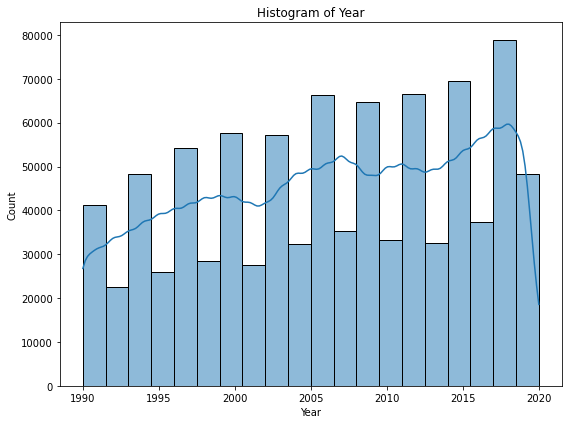

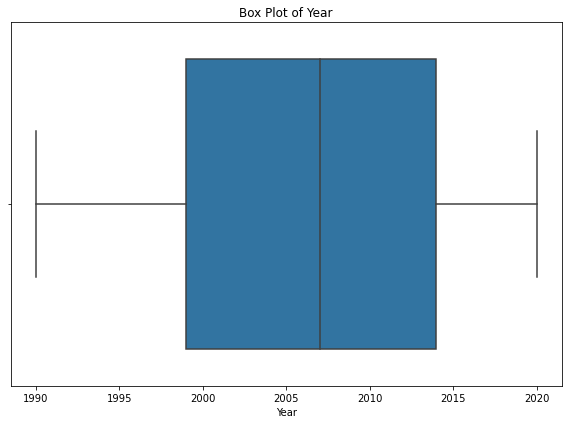

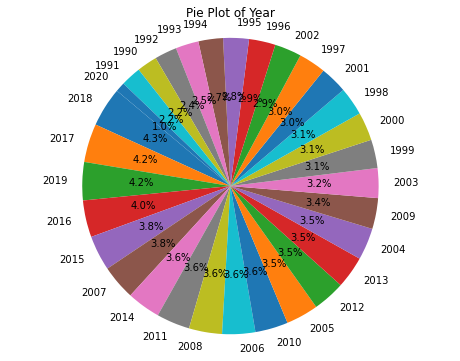

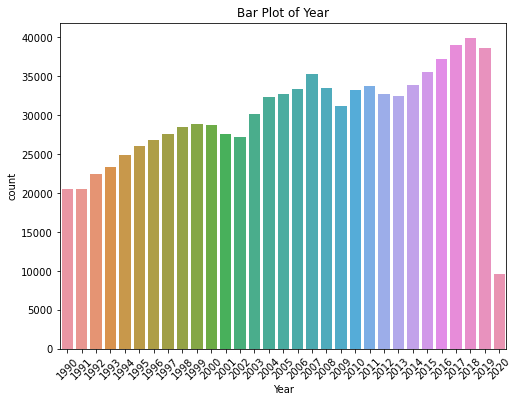

In [14]:
# Choose a specific column to visualize
column_to_visualize = "Year"

    # Generate all types of plots for the chosen column
figures, _ = create_visualizations_for_column(df, column_to_visualize)